# 自编码器

![encoder-decoder](images/encoder.png)
自动编码器的两个主要组成部分; 编码器和解码器 编码器将输入压缩成一小组“编码”（通常，编码器输出的维数远小于编码器输入） 解码器然后将编码器输出扩展为与编码器输入具有相同维度的输出 换句话说，自动编码器旨在“重建”输入，同时学习数据的有限表示（即“编码”）

## 导入数据

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from IPython.display import SVG
print(tf.__version__)

2.0.0-rc0


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.reshape((-1, 28*28)) / 255.0
x_test = x_test.reshape((-1, 28*28)) / 255.0

print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(60000, 784)   (60000,)
(10000, 784)   (10000,)


## 简单的自编码器

In [5]:
code_dim = 32

inputs = layers.Input(shape=(x_train.shape[1],), name='inputs')
code = layers.Dense(code_dim, activation='relu', name='code')(inputs)
outputs = layers.Dense(x_train.shape[1], activation='softmax', name='outputs')(code)

auto_encoder = keras.Model(inputs, outputs)
auto_encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
code (Dense)                 (None, 32)                25120     
_________________________________________________________________
outputs (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


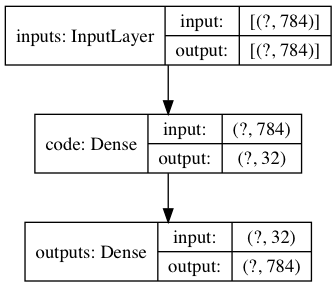

In [6]:
keras.utils.plot_model(auto_encoder, show_shapes=True)

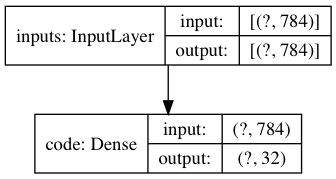

In [7]:
encoder = keras.Model(inputs,code)
keras.utils.plot_model(encoder, show_shapes=True)

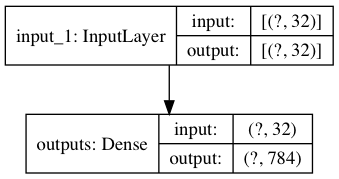

In [8]:
decoder_input = keras.Input((code_dim,))
decoder_output = auto_encoder.layers[-1](decoder_input)
decoder = keras.Model(decoder_input, decoder_output)
keras.utils.plot_model(decoder, show_shapes=True)

In [9]:
auto_encoder.compile(optimizer='adam',
                    loss='binary_crossentropy')

## 训练模型

In [10]:
%%time
history = auto_encoder.fit(x_train, x_train, batch_size=64, epochs=100, validation_split=0.1)

W0909 15:34:06.911388 140735620006784 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow_core/python/ops/math_grad.py:1394: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 3s 61us/sample - loss: 0.7057 - val_loss: 0.6798
Epoch 2/100
54000/54000 [==============================] - 2s 46us/sample - loss: 0.6798 - val_loss: 0.6746
Epoch 3/100
54000/54000 [==============================] - 2s 43us/sample - loss: 0.6769 - val_loss: 0.6730
Epoch 4/100
54000/54000 [==============================] - 2s 46us/sample - loss: 0.6759 - val_loss: 0.6727
Epoch 5/100
54000/54000 [==============================] - 2s 44us/sample - loss: 0.6755 - val_loss: 0.6723
Epoch 6/100
54000/54000 [==============================] - 2s 42us/sample - loss: 0.6751 - val_loss: 0.6721
Epoch 7/100
54000/54000 [==============================] - 2s 43us/sample - loss: 0.6749 - val_loss: 0.6719
Epoch 8/100
54000/54000 [==============================] - 3s 48us/sample - loss: 0.6747 - val_loss: 0.6717
Epoch 9/100
54000/54000 [==============================] - 3s 47us/sample - loss: 0.674

Epoch 76/100
54000/54000 [==============================] - 2s 46us/sample - loss: 0.6725 - val_loss: 0.6699
Epoch 77/100
54000/54000 [==============================] - 2s 45us/sample - loss: 0.6725 - val_loss: 0.6699
Epoch 78/100
54000/54000 [==============================] - 3s 47us/sample - loss: 0.6725 - val_loss: 0.6697
Epoch 79/100
54000/54000 [==============================] - 2s 46us/sample - loss: 0.6725 - val_loss: 0.6700
Epoch 80/100
54000/54000 [==============================] - 2s 45us/sample - loss: 0.6724 - val_loss: 0.6697
Epoch 81/100
54000/54000 [==============================] - 2s 45us/sample - loss: 0.6724 - val_loss: 0.6696
Epoch 82/100
54000/54000 [==============================] - 2s 46us/sample - loss: 0.6724 - val_loss: 0.6695
Epoch 83/100
54000/54000 [==============================] - 2s 45us/sample - loss: 0.6723 - val_loss: 0.6695
Epoch 84/100
54000/54000 [==============================] - 2s 45us/sample - loss: 0.6723 - val_loss: 0.6696
Epoch 85/100
54000/

In [11]:
encoded = encoder.predict(x_test)
decoded = decoder.predict(encoded)
print(encoded, decoded)

[[0.         1.4732988  4.1747346  ... 3.2871203  5.163615   4.332395  ]
 [4.5070257  1.4752972  2.7029297  ... 1.803179   2.5574226  0.        ]
 [1.9010756  3.0009336  3.1088047  ... 2.209354   3.8739128  3.7992883 ]
 ...
 [0.9948076  0.85562074 4.577586   ... 0.97272694 1.7868496  2.8600316 ]
 [3.3242526  0.9722583  2.4038675  ... 3.2575054  3.298472   1.5072374 ]
 [9.036724   1.8258109  2.1248267  ... 2.0414028  4.1721706  4.682329  ]] [[4.1179801e-14 4.4351631e-14 4.0775566e-14 ... 2.3325039e-14
  4.6752983e-14 3.7374895e-14]
 [4.1942290e-11 9.2238953e-11 5.9891800e-11 ... 4.1611527e-11
  4.4077630e-11 7.3868675e-11]
 [3.0987924e-13 8.6144498e-13 6.1056357e-13 ... 3.3786892e-13
  8.9486784e-13 7.0773541e-13]
 ...
 [2.8329840e-13 5.4634910e-13 3.3364988e-13 ... 3.4048567e-13
  6.4307180e-13 2.0794147e-13]
 [1.9711453e-12 9.6652601e-13 7.5694681e-13 ... 9.4337689e-13
  9.7179621e-13 8.0223865e-13]
 [5.2197504e-14 7.2079353e-14 5.7871453e-14 ... 7.7012954e-14
  1.6049775e-13 3.517956

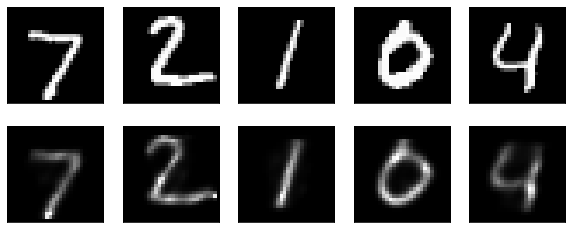

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(10,4))

n = 5
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, n+i+1)
    plt.imshow(decoded[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()